# 3. Preprocessing & Data Splitting

In [ ]:
import os

from utils import load_df, train_and_evaluate_model
from utils import preprocessing_def_cred as prep

import numpy as np 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

In [ ]:
df = load_df(os.path.join('..', 'data_analysis', 'datasets', 'processed', 'credit_card_cleaned.csv'))
df_3 = load_df(os.path.join('..', 'data_analysis', 'datasets', 'processed', 'credit_card_cleaned_outliers.csv'))

In [3]:
X_train, X_test, y_train, y_test, X, y = prep(df,False)
X_train_3, X_test_3, y_train_3, y_test_3, X3, y3 = prep(df_3)

# 3. Processing

Logistic Regression (Outliers).
Accuracy: 0.8086
ROC AUC: 0.6082
Ginni coefficient: 0.2164


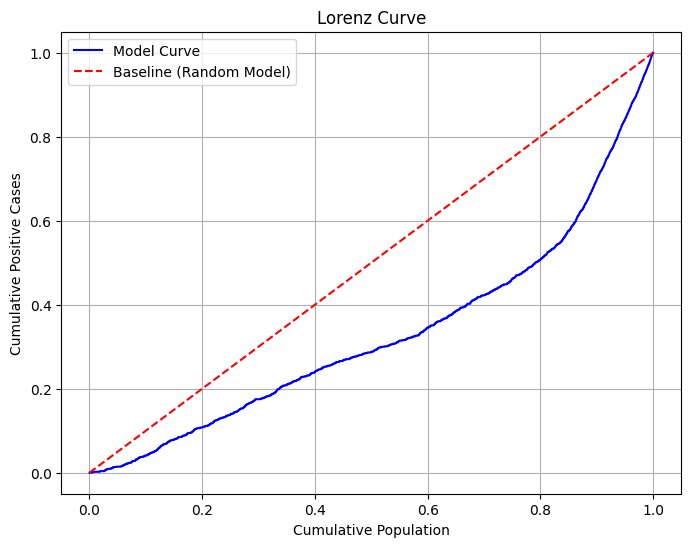

In [4]:
performance = []

lr_model = LogisticRegression()
performance.append(train_and_evaluate_model(lr_model, X_train_3, X_test_3, y_train_3, y_test_3, 'Logistic Regression (Outliers).'))

Random Forest (Outliers).
Accuracy: 0.8088
ROC AUC: 0.6233
Ginni coefficient: 0.2465


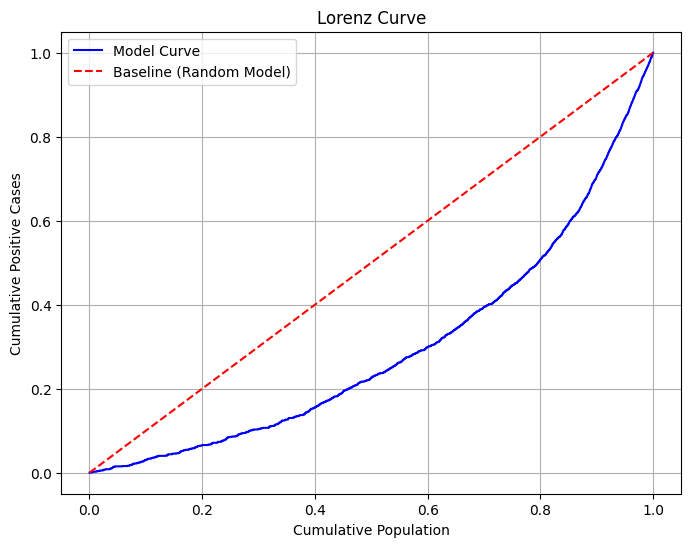

Cross-validation scores: 0.8138494910729184


In [10]:

rf_model = RandomForestClassifier(class_weight='balanced')
performance.append(train_and_evaluate_model(rf_model, X_train_3, X_test_3, y_train_3, y_test_3, 'Random Forest (Outliers).'))

scores = cross_val_score(rf_model, X3, y3, cv=5)
print('Cross-validation scores:',np.mean(scores))


XGBoost (Capped Outliers).
Accuracy: 0.7953
ROC AUC: 0.6733
Ginni coefficient: 0.3466


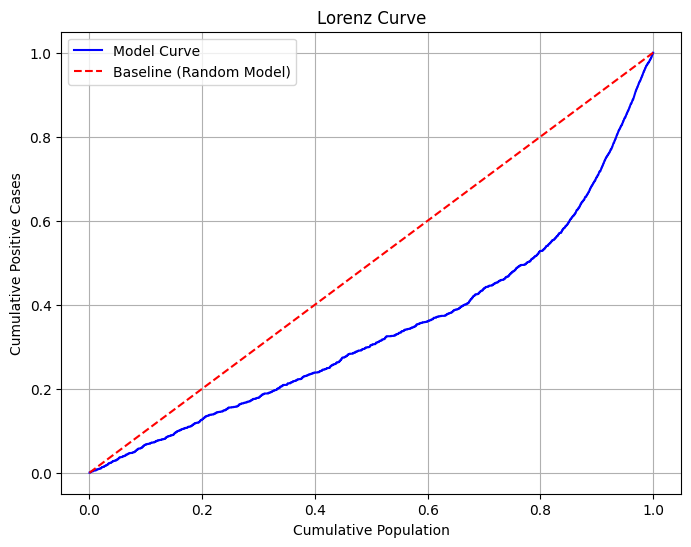

In [6]:
xgb_model = XGBClassifier(
    objective = 'binary:logistic',
    eval_metric = 'auc',
    scale_pos_weight = (y==0).sum()/(y==1).sum(),
    random_state=42
)

performance.append(train_and_evaluate_model(xgb_model, X_train, X_test, y_train, y_test, 'XGBoost (Capped Outliers).')) 


In [7]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='roc_auc')
print("Cross-validated AUC:", np.mean(cv_scores))


Cross-validated AUC: 0.7553247489432721
